In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Vamos a importat un dataset que proviene de [UCI Machine Learning Mastery](http://archive.ics.uci.edu/ml/index.php) y que tiene datos relacionados con la dirección de campañas de marketing (llamadas telefónicas) de una institución bancaria portuguesa. La finalidad de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito determinado (variable y). El dataset os lo proporcionamos nosotros.

In [2]:
dt = pd.read_csv('data/bank.csv')
dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
dt['education'].unique()


array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

## Análisis descriptivo de los datos

In [4]:
dt.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Chequeamos el nombre de las variables que tenemos

In [5]:
dt.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Vamos a comprobar los tipos de variables que tenemos en el dataset. Aquellas categoricas aparecen como object, las variables que toman valores enteros como int64 y las que toman valores con decimales son las que aparecen como float64

In [6]:
dt.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Comprobamos el tamaño del dataset. Vemos que tenemos 21 variables diferentes y 41188 instancias

In [7]:
dt.shape

(41188, 21)

Vamos a imprimir los valores posibles de las variables que son categoricas

In [8]:
for var in dt.columns:
    if dt[var].dtype == 'object':
        print(var, '\t', dt[var].unique(), '\n')

job 	 ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student'] 

marital 	 ['married' 'single' 'divorced' 'unknown'] 

education 	 ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate'] 

default 	 ['unknown' 'no' 'yes'] 

housing 	 ['yes' 'no' 'unknown'] 

loan 	 ['no' 'yes' 'unknown'] 

contact 	 ['cellular' 'telephone'] 

month 	 ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec'] 

day_of_week 	 ['thu' 'fri' 'tue' 'mon' 'wed'] 

poutcome 	 ['nonexistent' 'success' 'failure'] 



Nuestra variable predictora, es decir, aquella que deseamos clasificar es la variable y, que nos indica si un cliente se suscribe o no a un depósito. Se trata pues, de una variable binaria, en la que si toma el valor 1 indica que si que se suscribe y si toma el valor 0 indica que no se suscribe.

En ocasiones, si alguna variables categoricas tienen demasiados valores, se pueden agregar valores para que tomen el mismo valor. Por ejemplo es el caso de la variable de educación

In [9]:
dt['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Vamos a hacer que la variable agrupe los valores “basic.4y”, “basic.9y” y “basic.6y” para que se llamen como 'basic'

In [10]:
dt['education']=np.where(dt['education'] =='basic.9y', 'Basic', dt['education'])
dt['education']=np.where(dt['education'] =='basic.6y', 'Basic', dt['education'])
dt['education']=np.where(dt['education'] =='basic.4y', 'Basic', dt['education'])

Después de agruparlos, la variable tiene los siguientes posibles valores, en los que  “basic.4y”, “basic.9y” y “basic.6y” ya no están, y aparece la nueva variable basic.

In [11]:
dt['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Exploración de los datos

Cuantos datos tengo de cada caso?

In [12]:
dt['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

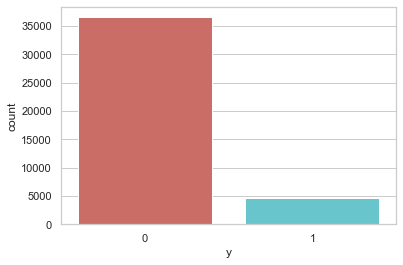

In [13]:
sns.countplot(x='y', data=dt, palette='hls')
plt.show()

In [14]:
count_no_sub = len(dt[dt['y']==0])
count_sub = len(dt[dt['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", round(pct_of_no_sub*100, 2))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", round(pct_of_sub*100, 2))

percentage of no subscription is 88.73
percentage of subscription 11.27


Tenemos una clase desbalanceada, esto es, que tenemos más casos de un valor que del otro. En este caso, tenemos más casos de no suscripción, a lo que si suscripción.

Vamos a seguir explorando para ver, de media, que tipo de características tiene las otras variables para cada uno de los casos.

In [15]:
dt.groupby('y').mean()

<ipython-input-15-185af6871b0a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observaciones:
- La edad media de los clietnes que han comprado el depósito es mayor que los clientes que no han accedido a comprarlo.
- Sorprendentemente el número de campañas para los clietnes que han accedido a comprar el depósito es menor que para aquellos que no han accedido

Podemos realizar el mismo estudio para otras variables:

In [16]:
dt.groupby('job').mean()

<ipython-input-16-8bd0c490dbe3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [17]:
dt.groupby('marital').mean()

<ipython-input-17-a914d679a8eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt.groupby('marital').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [18]:
dt.groupby('education').mean()

<ipython-input-18-d7fa08490dd4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt.groupby('education').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Visualizaciones

Text(0, 0.5, 'Frequency of Purchase')

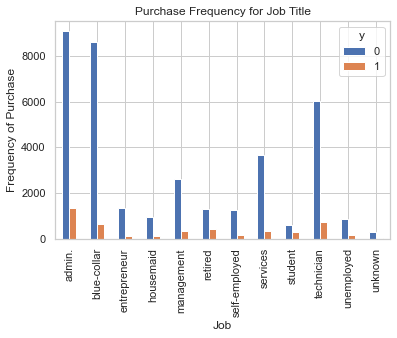

In [19]:
%matplotlib inline
pd.crosstab(dt.job,dt.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
# plt.savefig('purchase_fre_job')

La frecuencia de comprar un depósito depende en gran medida del tipo de trabajo que se tiene. Por tanto, el trabajo puede ser un gran predictor para la variable y

Text(0, 0.5, 'Proportion of Customers')

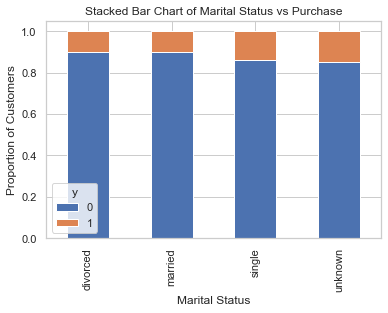

In [20]:
table=pd.crosstab(dt.marital,dt.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
# plt.savefig('mariral_vs_pur_stack')

El estatus matrimonial no parece ser significativo a la hora de predecir la variable y

Text(0, 0.5, 'Proportion of Customers')

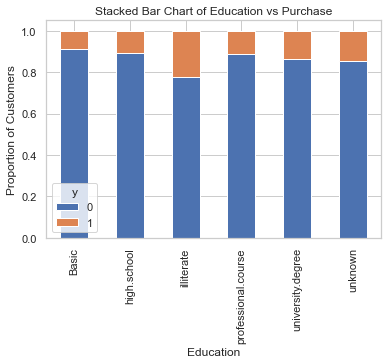

In [21]:
table=pd.crosstab(dt.education,dt.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
# plt.savefig('edu_vs_pur_stack')

El nivel de educación parece ser influyente a la hora de predecir la variable y

Text(0, 0.5, 'Frequency of Purchase')

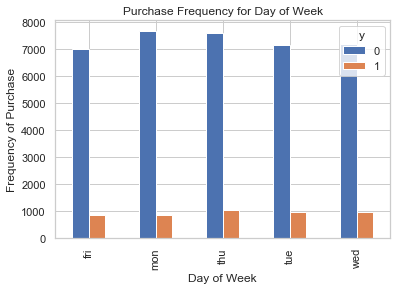

In [22]:
pd.crosstab(dt.day_of_week,dt.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
# plt.savefig('pur_dayofweek_bar')

El día de la semana parece no tener mucha relevancia

Text(0, 0.5, 'Frequency of Purchase')

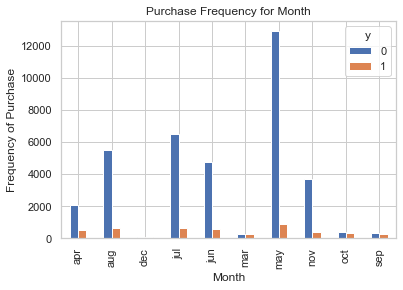

In [23]:
pd.crosstab(dt.month,dt.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
# plt.savefig('pur_fre_month_bar')

El més si que parece ser una buena variable para usar como predictora de la variable y

Text(0, 0.5, 'Frequency')

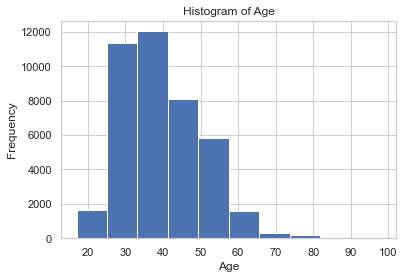

In [24]:
dt.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('hist_age')

Esto representa un histograma de la variable edad en el banco. Podemos decir que es una variable que se aproxima a la forma de una gaussiana con una media centrada en los 30-40 años.

Text(0, 0.5, 'Frequency of Purchase')

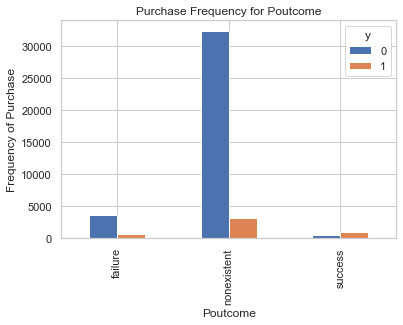

In [25]:
pd.crosstab(dt.poutcome,dt.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
# plt.savefig('pur_fre_pout_bar')

Poutcome representa el estado de la anterior campaña. Si la anterior campaña para el cliente fue exitosa entonces no hay mucha varianza. Si fue un fracaso, mayoritariamente no repiten en otra campaña. Si no existe ninguna anterior, entonces lo más probable es que no accedan a otra campaña, aunque hay gente que lo hace. Puede ser un buen indicador para predecir

## Vamos a crear variables dummies

Vamos a crear un dataset desplegado en el que cada una de las posibles valores de cada variable categórica aparece como una columna, y aquellas instancias que le corresponde ese valor tienen un 1 en dicha variable. Aquellas a las que no les corresponde, entonces tienen un cero. Son, variables dummies.

In [26]:
pd.get_dummies(dt['job'], prefix='job')

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0,0
41184,0,0,0,1,0,0,0,0,0,0,0,0
41185,1,0,0,0,0,0,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dt[var], prefix=var)
    dt1=dt.join(cat_list)
    dt=dt1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=dt.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Dataset final es tal que:

In [28]:
data_final=dt[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

## SMOTE

Con nuestros datos de entrenamiento creados, vamos a usar SMOTE:
- Muestrea datos de la clase minoritaria, en este caso, no subscripción
- Lo hace de forma aleatoria basándose en el algoritmo KNN

In [29]:
!pip install imbalanced-learn

In [30]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [31]:
print('X train', os_data_X.shape)
print('Y train', os_data_y.shape, '\n')
print('X test', X_test.shape)
print('Y test', y_test.shape)

X train (51134, 61)
Y train (51134, 1) 

X test (12357, 61)
Y test (12357, 1)


Ahora que tenemos un dataset perfectamente balanceado, te habrás fijado que solo hemos hecho sampling sobre los datos de entrenamiento. Son los datos que usamos para crear el modelo. Los datos de test no es necesario muestrearlos, ya que son con los que vamos a testear el modelo. Ningun dato de test es usado para el entrenamiento.

## Clasificación

Vamos a llevar a cabo nuestro modelo de clasificación usando regresión logística sobre los datos de entrenamiento, para luego testear usando los datos de test.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y.values.ravel())

LogisticRegression()

Usamos los datos de test para testear el modelo y obtenemos una precisión de 0.91 que es una buena métrica

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


Vamos a valorar la matriz de confusión. Recordemos que tenemos ((verdaderos positivos, falsos positivos), (falsos negativos, verdaderos negativos)). De esta forma tenemos 10119 + 912 casos en los que hemos acertado, y 862 + 464 en los que no.

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10213   768]
 [  523   853]]


Scikit learn tiene una función para crear un report de las medidas de clasificación. Se importa de la siguiente forma:

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10981
           1       0.53      0.62      0.57      1376

    accuracy                           0.90     12357
   macro avg       0.74      0.77      0.75     12357
weighted avg       0.90      0.90      0.90     12357



## Área bajo la curva ROC

El área bajo la curva ROC es una herramienta usada para los clasificadores binarios. La línea punteada representa la curva ROC de un clasificador puramente aleatorio. Un buen clasificador se mantiene lo más lejos de la líneal posible. Hacia la esquina superior izquierda.

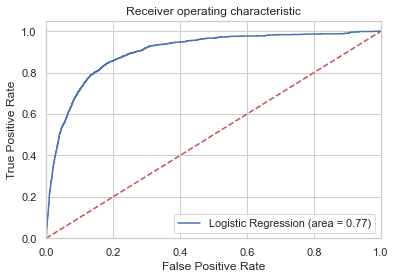

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### Ejercicio

Aplica lo aprendido sobre regresión logística en un nuevo dataset (wine), y comprueba como de bien se ajusta el modelo. Deja un 30% del dataset para test.